In [1]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
wheather = pandas.read_csv("./seattleWeather_1948-2017Copy.csv", header = 0, sep = ",")
# can specify headers manually by adding names=["DATE", "PRCP", "TMAX", "TMIN", "RAIN"] to above
print(wheather.head())
print(wheather.describe())

       DATE  PRCP  TMAX  TMIN  RAIN
0  19480101  0.47    51    42  True
1  19480102  0.59    45    36  True
2  19480103  0.42    45    35  True
3  19480104  0.31    45    34  True
4  19480105  0.17    45    32  True
               DATE          PRCP          TMAX          TMIN
count  2.555100e+04  25548.000000  25551.000000  25551.000000
mean   1.982543e+07      0.106222     59.544206     44.514226
std    2.019306e+05      0.239031     12.772984      8.892836
min    1.948010e+07      0.000000      4.000000      0.000000
25%    1.965063e+07      0.000000     50.000000     38.000000
50%    1.982122e+07      0.000000     58.000000     45.000000
75%    2.000062e+07      0.100000     69.000000     52.000000
max    2.017121e+07      5.020000    103.000000     71.000000


In [4]:
print(wheather.isnull().values.any())
#We have a few days without rain data. let's just remove them.
#"1998-06-02","NA",72,52,"NA"

True


In [5]:
wheather = wheather.dropna()

In [33]:
#We want to predict the RAIN value, so let's break out data into two sets. X, the independent data, and Y, the dependent data we want to predict.

X = wheather.drop(["PRCP", "RAIN"], axis=1) #all columns except PRCP and RAIN, as both give it away.
y = wheather["PRCP"]

In [34]:
from sklearn.model_selection import train_test_split

#Using the train_test_split function, we create the appropriate train/test data for our features ("X_train" and "X_test" respectively) and target data ("Y_train" and "Y_test"). We are specifying our test data to be 20% of the total data (80/20 split model, thanks Pareto).
#We are also providing a seed (42) to be able to reproduce this split if we want to come back to it later.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape) #20438 training rows
print(X_test.shape) #5110 testing rows

(20438, 3)
(5110, 3)


In [7]:
#standardize
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#train_scaled = scaler.fit_transform(X_train[["PRCP", "TMAX", "TMIN"]])

#print(train_scaled.head())

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [9]:
#model evaluation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


tree_mse = mean_squared_error(y_train, tree_model.predict(X_train))
tree_mae = mean_absolute_error(y_train, tree_model.predict(X_train))
rf_mse = mean_squared_error(y_train, rf_model.predict(X_train))
rf_mae = mean_absolute_error(y_train, rf_model.predict(X_train))

In [10]:
from math import sqrt

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))


tree_test_mse = mean_squared_error(y_test, tree_model.predict(X_test))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(X_test))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(X_test))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

#Random forrest does better than decision tree, with an avg error of +-0.24 inches instead of +-0.29 inches of precipitation. Still, both aren't great.
#Both are also doing much much better on the training data vs the test data, +-0.03 error vs 0.29 error is a *big* difference in inches.

Decision Tree training mse =  0.000777425220993574  & mae =  0.0009669895945461068  & rmse =  0.027882346045366664
Random Forest training mse =  0.010603755725218619  & mae =  0.04815989170499397  & rmse =  0.10297453920857631
Decision Tree test mse =  0.08548409001956948  & mae =  0.14001761252446185  & rmse =  0.2923766235860341
Random Forest test mse =  0.05663309818909502  & mae =  0.12319634656602368  & rmse =  0.23797709593382094


In [11]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("\n")

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = numpy.sqrt(-scores)
display_scores(tree_rmse_scores)

scores = cross_val_score(rf_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = numpy.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [0.32760978 0.30882473 0.31272954 0.307132   0.29483382 0.31676327
 0.32192801 0.32662071 0.30749909 0.31098861]
Mean: 0.31349295619538065
Standard deviation: 0.00952190322900306


Scores: [0.25395305 0.24716958 0.25271738 0.23969975 0.22668431 0.25090182
 0.24761773 0.23527034 0.22835169 0.26229382]
Mean: 0.2444659466898466
Standard deviation: 0.011035036738412368




In [13]:
#provide date in form 19480103
def predictVsActuals(day):
    precipPredictDay = X.loc[X['DATE'] == day]
    precipPredictValue = round(rf_model.predict(precipPredictDay)[0], 3)

    
    precipActual = wheather.loc[wheather['DATE'] == day]
    precipActualValue = round(precipActual.iloc[0]["PRCP"], 3)

    print("On", precipActual.iloc[0]["DATE"], "there was a high of", precipActual.iloc[0]["TMAX"], "and a low of", precipActual.iloc[0]["TMIN"])
    print("There were", precipActualValue, "inches of rainfall")
    print("We predicted",precipPredictValue, "inches of rainfall")
    print("we were off by ", round(abs(precipActualValue-precipPredictValue), 3), "inches")
    print("\n")

#predictVsActuals(19550302)
#predictVsActuals(19880502)
#predictVsActuals(19960815)

In [14]:
def predictFuture(day):
    
    precipPredictValue = round(rf_model.predict(day)[0], 3)


    print("We predicted",precipPredictValue, "inches of rainfall")

    print("\n")

# Model Iteration - Can we do better using Explainable ML?

A recent paper by Cynthia Rudin ([Please Stop Explaining Black Box Models for High Stakes Decisions](https://arxiv.org/abs/1811.10154)) discusses the problems with using uninterpretable machine learning. She refutes the idea that there is an inherent tradeoff between explainability and accuracy in machine learning, and argues that when a proper course of knowledge discovery is followed explainable models can perform at similar accuracy to black-boxes.

Let's play with this theory a bit on our weather data!

In [64]:
import numpy as np
import pandas as pd

In [146]:
X = wheather.drop(["PRCP", "RAIN"], axis=1) #all columns except PRCP and RAIN, as both give it away.
y = wheather["PRCP"]

In [147]:
X['DATETIME'] = pd.to_datetime(X.DATE.apply(str))

In [148]:
X['MONTH'] = X.DATETIME.apply(lambda x: x.month)

In [149]:
X['YEAR'] = X.DATETIME.apply(lambda x: x.year)

In [150]:
X['DAY'] = X.DATETIME.apply(lambda x: x.day)

In [151]:
X_copy = X.copy(deep=True)

In [152]:
X = X.drop(["DATE", "DATETIME", "DAY"], axis=1)

In [97]:
#Using the train_test_split function, we create the appropriate train/test data for our features ("X_train" and "X_test" respectively) and target data ("Y_train" and "Y_test"). We are specifying our test data to be 20% of the total data (80/20 split model, thanks Pareto).
#We are also providing a seed (42) to be able to reproduce this split if we want to come back to it later.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape) #20438 training rows
print(X_test.shape) #5110 testing rows

(20438, 4)
(5110, 4)


In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

#model evaluation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


tree_mse = mean_squared_error(y_train, tree_model.predict(X_train))
tree_mae = mean_absolute_error(y_train, tree_model.predict(X_train))
rf_mse = mean_squared_error(y_train, rf_model.predict(X_train))
rf_mae = mean_absolute_error(y_train, rf_model.predict(X_train))

from math import sqrt

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))


tree_test_mse = mean_squared_error(y_test, tree_model.predict(X_test))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(X_test))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(X_test))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Decision Tree training mse =  0.002414429412532211  & mae =  0.00733478487784193  & rmse =  0.04913684373799574
Random Forest training mse =  0.011962559962283492  & mae =  0.05145117168144617  & rmse =  0.10937348838856467
Decision Tree test mse =  0.10110316155686021  & mae =  0.15125831702544032  & rmse =  0.3179672334641735
Random Forest test mse =  0.05468321550917263  & mae =  0.12494152898145561  & rmse =  0.23384442586722615


In [46]:
!pip install treeinterpreter

In [47]:
from treeinterpreter import treeinterpreter as ti

In [48]:
prediction, bias, contributions = ti.predict(rf_model, X_test)

In [53]:
for i in range(len(X_test[:10])):
    print("Instance", i)
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 X_test.columns), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print("-"*20 )

Instance 0
Bias (trainset mean) 0.10662613758684644
Feature contributions:
MONTH -0.05
TMIN -0.04
TMAX -0.01
--------------------
Instance 1
Bias (trainset mean) 0.10662613758684644
Feature contributions:
TMAX -0.09
TMIN -0.01
MONTH -0.01
--------------------
Instance 2
Bias (trainset mean) 0.10662613758684644
Feature contributions:
TMAX -0.11
TMIN -0.0
MONTH -0.0
--------------------
Instance 3
Bias (trainset mean) 0.10662613758684644
Feature contributions:
TMIN -0.1
TMAX 0.01
MONTH -0.01
--------------------
Instance 4
Bias (trainset mean) 0.10662613758684644
Feature contributions:
TMAX 0.08
TMIN 0.01
MONTH 0.01
--------------------
Instance 5
Bias (trainset mean) 0.10662613758684644
Feature contributions:
TMAX 0.05
TMIN -0.03
MONTH -0.0
--------------------
Instance 6
Bias (trainset mean) 0.10662613758684644
Feature contributions:
TMIN -0.05
MONTH -0.03
TMAX 0.0
--------------------
Instance 7
Bias (trainset mean) 0.10662613758684644
Feature contributions:
MONTH -0.12
TMIN 0.06
TMAX

In [57]:
!conda install -y python-graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    expat-2.2.5                |    he1b5a44_1003         191 KB  conda-forge
    graphviz-2.40.1            |       h5933667_1         6.4 MB  conda-forge
    libtool-2.4.6              |    h14c3975_1002         512 KB  conda-forge
    python-graphviz-0.12       |             py_0          18 KB  conda-forge
    xorg-libxpm-3.5.12         |    h14c3975_1002          64 KB  conda-forge
    xorg-libxt-1.1.5           |    h516909a_1003         367 KB  conda-forge
    ------------------------------------------------------------
                    

In [ ]:
!pip install pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.109171 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.109171 to fit



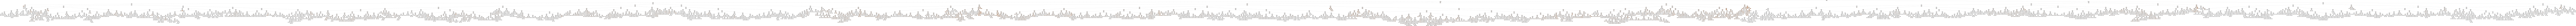

In [58]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_model,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

Well that model is a hairy mess. No way we're going to interpret that. However, we can try pruning the decision tree to see if we can get an explainable model without sacrificing accuracy.

Decision Tree training mse =  0.050535435863366195  & mae =  0.12183352057497457  & rmse =  0.22480088047729305
Decision Tree test mse =  0.04722587011263725  & mae =  0.12235007848059791  & rmse =  0.21731514009069236


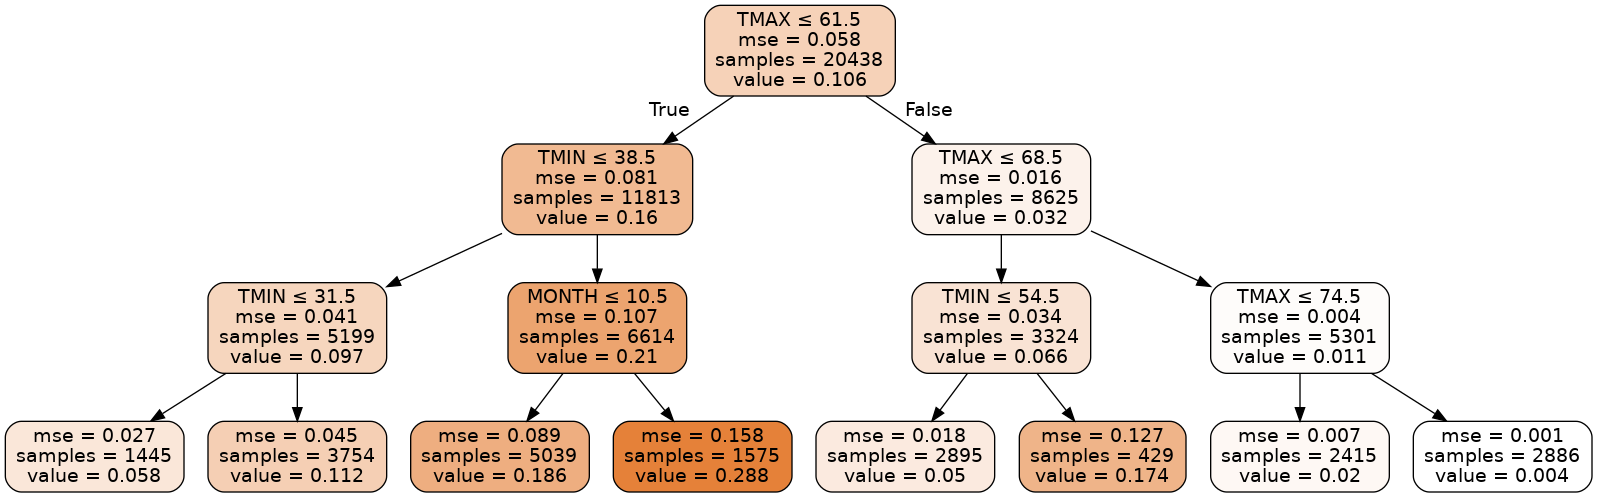

In [100]:
tree_model = DecisionTreeRegressor(criterion="mse", max_depth=3)
tree_model.fit(X_train, y_train)

#model evaluation

tree_mse = mean_squared_error(y_train, tree_model.predict(X_train))
tree_mae = mean_absolute_error(y_train, tree_model.predict(X_train))

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))

tree_test_mse = mean_squared_error(y_test, tree_model.predict(X_test))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(X_test))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))

dot_data = StringIO()
export_graphviz(tree_model,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

Decision Tree training mse =  0.051600863445402746  & mae =  0.1243864324875417  & rmse =  0.22715823437727883
Decision Tree test mse =  0.04865121011828974  & mae =  0.1250123994152518  & rmse =  0.22057019317734147


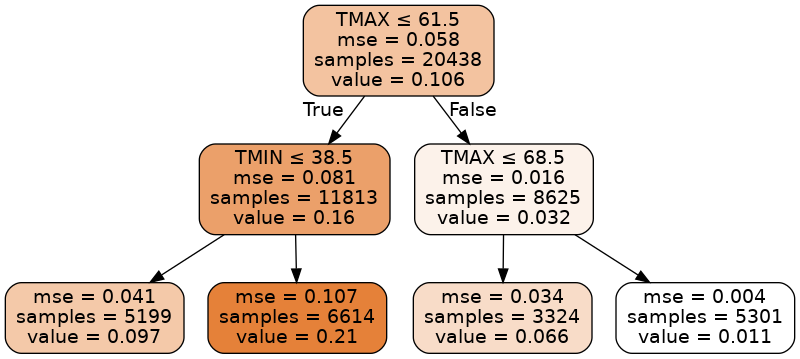

In [101]:
tree_model = DecisionTreeRegressor(criterion="mse", max_depth=2)
tree_model.fit(X_train, y_train)

#model evaluation

tree_mse = mean_squared_error(y_train, tree_model.predict(X_train))
tree_mae = mean_absolute_error(y_train, tree_model.predict(X_train))

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))

tree_test_mse = mean_squared_error(y_test, tree_model.predict(X_test))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(X_test))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))

dot_data = StringIO()
export_graphviz(tree_model,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

Decision Tree training mse =  0.04887515042698301  & mae =  0.11869830368768593  & rmse =  0.22107724990822328
Decision Tree test mse =  0.046522855408654314  & mae =  0.11983518174640183  & rmse =  0.21569157472802297


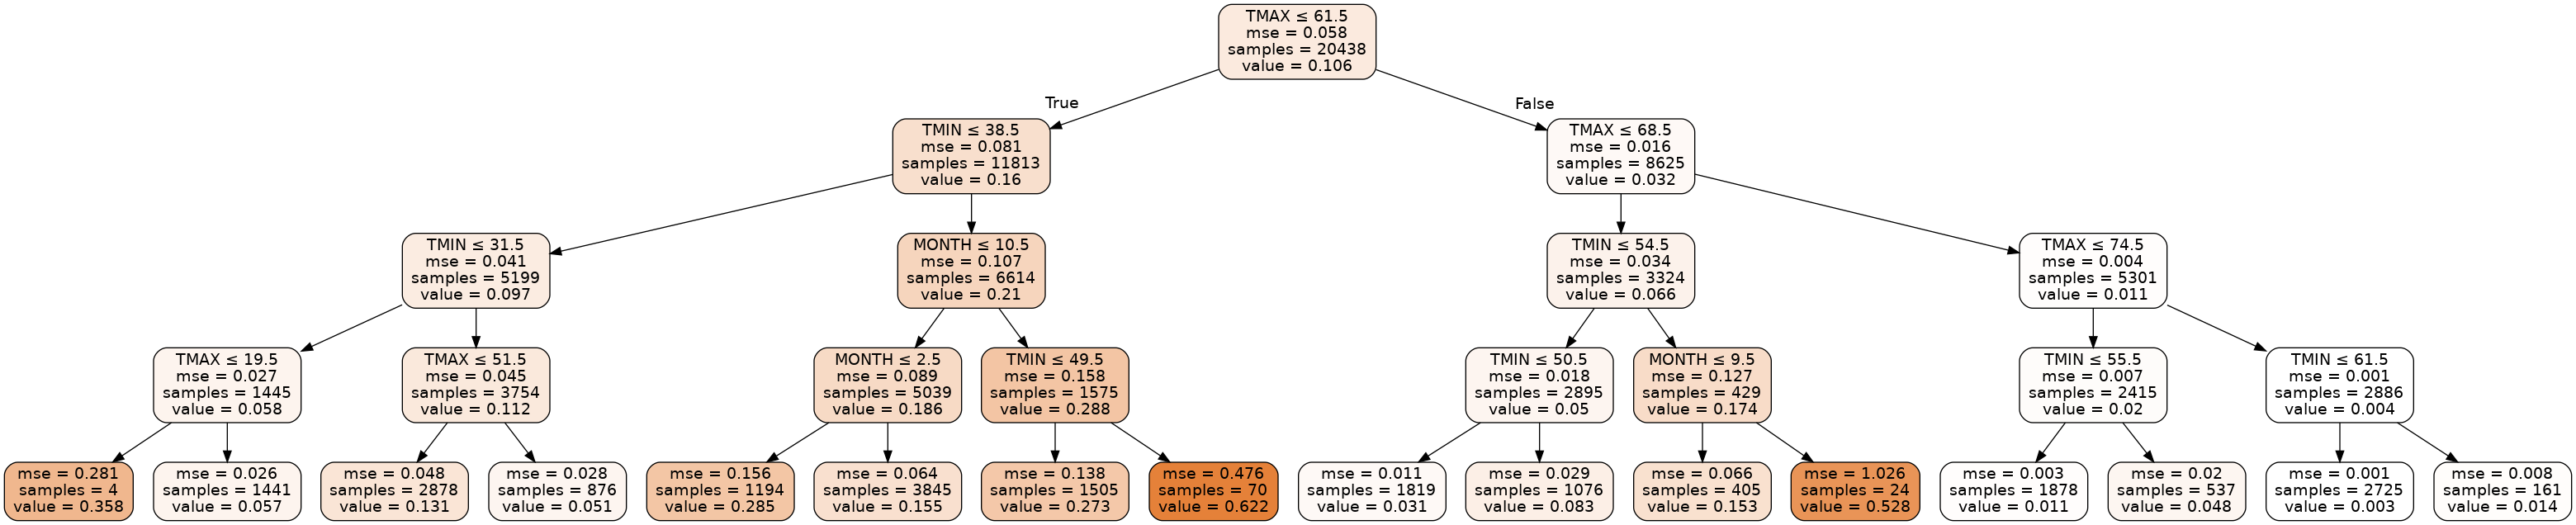

In [102]:
tree_model = DecisionTreeRegressor(criterion="mse", max_depth=4)
tree_model.fit(X_train, y_train)

#model evaluation

tree_mse = mean_squared_error(y_train, tree_model.predict(X_train))
tree_mae = mean_absolute_error(y_train, tree_model.predict(X_train))

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))

tree_test_mse = mean_squared_error(y_test, tree_model.predict(X_test))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(X_test))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))

dot_data = StringIO()
export_graphviz(tree_model,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

# Trying a boosted regressor

In [105]:
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libxgboost-0.90            |       he1b5a44_2         2.4 MB  conda-forge
    py-xgboost-0.90            |   py37he1b5a44_2          73 KB  conda-forge
    xgboost-0.90               |   py37he1b5a44_2          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/linux-64::_py-xgboost-mutex-2.0-cpu_0


In [117]:
import xgboost
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict

In [130]:
model = xgboost.XGBRegressor(seed=42)
model.fit(X_train, y_train)

tree_mse = mean_squared_error(y_train, model.predict(X_train))
tree_mae = mean_absolute_error(y_train, model.predict(X_train))

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))

tree_test_mse = mean_squared_error(y_test, model.predict(X_test))
tree_test_mae = mean_absolute_error(y_test, model.predict(X_test))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:17:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Decision Tree training mse =  0.044643729599170755  & mae =  0.11230199109750878  & rmse =  0.21129062828050552
Decision Tree test mse =  0.04397010968814953  & mae =  0.11520302469949668  & rmse =  0.20969050929441116


In [133]:
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('TMAX', 224), ('TMIN', 205), ('MONTH', 146), ('YEAR', 120)])

XGBoost performs a bit better. We show the most important features (take these with a grain of salt though, as tuning the parameters can shift this ranking around) as a rough interpretation of the model's inner-workings.

Were we justified in dropping the day from our model? Let's see if we can eeke out some more performance by adding it into the data.

In [161]:
X = X_copy.copy(deep=True)
X = X.drop(["DATE", "DATETIME"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
model = xgboost.XGBRegressor(seed=42)
model.fit(X_train, y_train)

tree_mse = mean_squared_error(y_train, model.predict(X_train))
tree_mae = mean_absolute_error(y_train, model.predict(X_train))

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))

tree_test_mse = mean_squared_error(y_test, model.predict(X_test))
tree_test_mae = mean_absolute_error(y_test, model.predict(X_test))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:26:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Decision Tree training mse =  0.044463298843667926  & mae =  0.11236461978746563  & rmse =  0.2108632230704727
Decision Tree test mse =  0.044021146900556904  & mae =  0.11536052087748354  & rmse =  0.2098121705253461


In [163]:
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('TMAX', 204),
             ('TMIN', 201),
             ('MONTH', 140),
             ('YEAR', 105),
             ('DAY', 47)])

It looks like adding the Day in doesn't help much and may even hurt

Takeaway: Machine learning has the potential to help us out a lot. But it can hurt too by making us lazy and complacent! Whenever possible, we ought to work in collaboration with our models. We should ask our models to teach us so that we learn together, and that will help us to be the best architects we can hope to be.